In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:\\Users\\Hp\\Downloads\\archive"))
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras.backend as K
from sklearn.utils import shuffle
# Any results you write to the current directory are saved as output.

['cell_images']


In [14]:
parasitized_data = os.listdir('C:\\Users\\Hp\\Downloads\\archive\\cell_images\\Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('C:\\Users\\Hp\\Downloads\\archive\\cell_images\\Uninfected')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


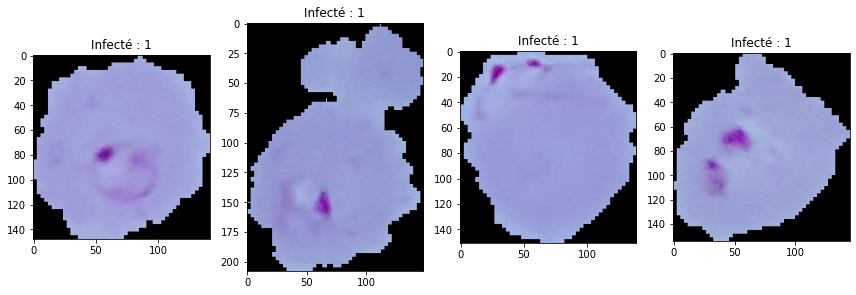

In [17]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:\\Users\\Hp\\Downloads\\archive\\cell_images\\Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Infecté : 1')
    plt.tight_layout()
plt.show()


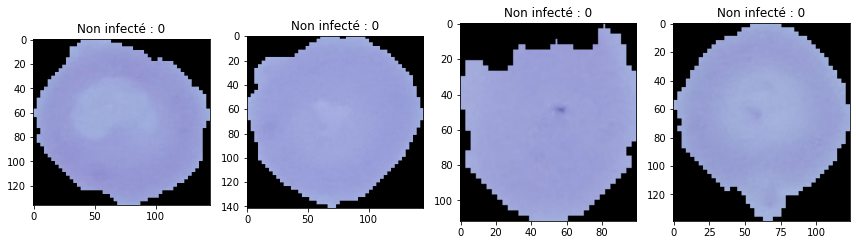

In [18]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:\\Users\\Hp\\Downloads\\archive\\cell_images\\Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Non infecté : 0')
    plt.tight_layout()
plt.show()

In [23]:
X_para = []
Y_para = []
myfiles = glob.glob("C:\\Users\\Hp\\Downloads\\archive\\cell_images\\Parasitized\\*.png")
for file in myfiles:
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_para.append(image)
    Y_para.append(1)
    


In [24]:
X_un , Y_un = [],[]
unfiles = glob.glob("C:\\Users\\Hp\\Downloads\\archive\\cell_images\\Uninfected\\*.png")
for file in unfiles:
    kernel = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    X_un.append(img)
    Y_un.append(0)

    

In [25]:
X = X_para + X_un
Y = Y_para + Y_un
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state =42)
X = np.array(X)


In [26]:
inp = Input(shape = (120 , 120 , 3))
x = Conv2D(filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(inp)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 32 , kernel_size = (4,4) , strides = (2,2) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 64 , kernel_size = (3,3) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 128 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 256 , kernel_size = (2,2) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = AveragePooling2D(pool_size = (3,3) , strides = (1,1) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(120)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(60)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation("relu")(x)
x = Dropout(0.)(x)
x = Dense(1)(x)
output = Activation("sigmoid")(x)
model  = Model(inputs =inp , outputs = output )

In [27]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(np.array(X_train) ,np.array(Y_train) , epochs = 13
                ,validation_split = 0.2 )

Epoch 1/13
483/483 [==============================] - 193s 400ms/step - loss: 0.3422 - accuracy: 0.8488 - val_loss: 0.0476 - val_accuracy: 0.9907
Epoch 2/13
483/483 [==============================] - 217s 450ms/step - loss: 0.0577 - accuracy: 0.9868 - val_loss: 0.0358 - val_accuracy: 0.9927
Epoch 3/13
483/483 [==============================] - 213s 441ms/step - loss: 0.0795 - accuracy: 0.9832 - val_loss: 0.0940 - val_accuracy: 0.9912
Epoch 4/13
483/483 [==============================] - 209s 432ms/step - loss: 0.0464 - accuracy: 0.9885 - val_loss: 0.0431 - val_accuracy: 0.9943
Epoch 5/13
483/483 [==============================] - 217s 449ms/step - loss: 0.0270 - accuracy: 0.9923 - val_loss: 0.0201 - val_accuracy: 0.9948
Epoch 6/13
483/483 [==============================] - 213s 442ms/step - loss: 0.0214 - accuracy: 0.9946 - val_loss: 0.0141 - val_accuracy: 0.9959
Epoch 7/13
483/483 [==============================] - 214s 443ms/step - loss: 0.0215 - accuracy: 0.9955 - val_loss: 0.0097 -

In [28]:
y_pre = model.predict(np.array(X_test))
y_pre = np.reshape(y_pre ,(8268,) )
Y_test = np.array(Y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0
np.sum(Y_test == y_pre)/8268

0.9957668118045476

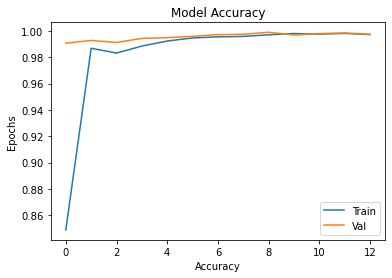

In [29]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

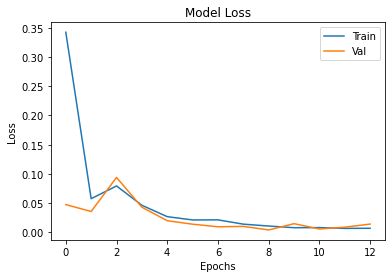

In [30]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [42]:
print('Confusion Matrix')
print(confusion_matrix(Y_test, y_pre))

Confusion Matrix
[[4122    0]
 [  35 4111]]
